# **Environmental Setup 📨**

In this section of the notebook, we have worked upon importing all the required libraries in order to ensure the smooth functioning of the notebook. In addition to that, we have also set up some constants and hyperparams.

In [ ]:
!pip install gym
!pip install gym[atari]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [21]:
# Base Imports
import gym
import numpy as np

# Recording Data
from collections import Counter
from collections import defaultdict
from collections import namedtuple

# Visualizing Model
import moviepy.editor
from gym.wrappers.monitoring.video_recorder import VideoRecorder

  from scipy.ndimage.filters import sobel



In [9]:
# Environment Constants
GAMMA = 0.9
TEST_EPS = 20
ENV_NAME = "FrozenLake-v1"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Markov Decision Processes 🌳**

To grasp **Q-learning**, let's delve into **Markov decision processes**. They're the **foundation of Q-learning**. **MDPs** are obtained from **MRPs** which are obtained from **MPs.**

## **Markov Processes 1️⃣**

These are also called **Markov Chains**. Consider a system in which all you can do is to observe the environment, each observation is called a **State**, and the **system can jump between multiple states**.

**State space**
 * The set of all possible states is known as a **state space**. We generally want the **state space** to be **finite and small**, but it can be **extremely large** to **incorporate with infinite states**.

**History**
 * The **collection of these state space** or **observations over time** is known as **history**.

> **Markov Property**

To call such a system **Markov process**, it need to fulfill **Markov property**, which says that **each state** should be **independent and unique**, and it can only be derived from **any other independent state.** It says that **any future state** can **only be derived from this state**, and **only this state**.

> **Transition matrix**

Once our system satisfies the **Markov property**, we can set up the **transition matrix**. The **transition matrix** defines the probability of a **state to transition into any other state**.

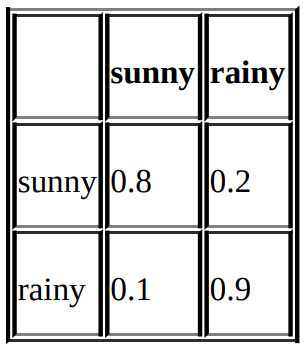

The most common form of visual representation of **Markov processes** is the use of **graphs and edges** in order to **describe the states** and **the transitions**. These are generally used in **finite state machines**, which comes under the **automata theory**.

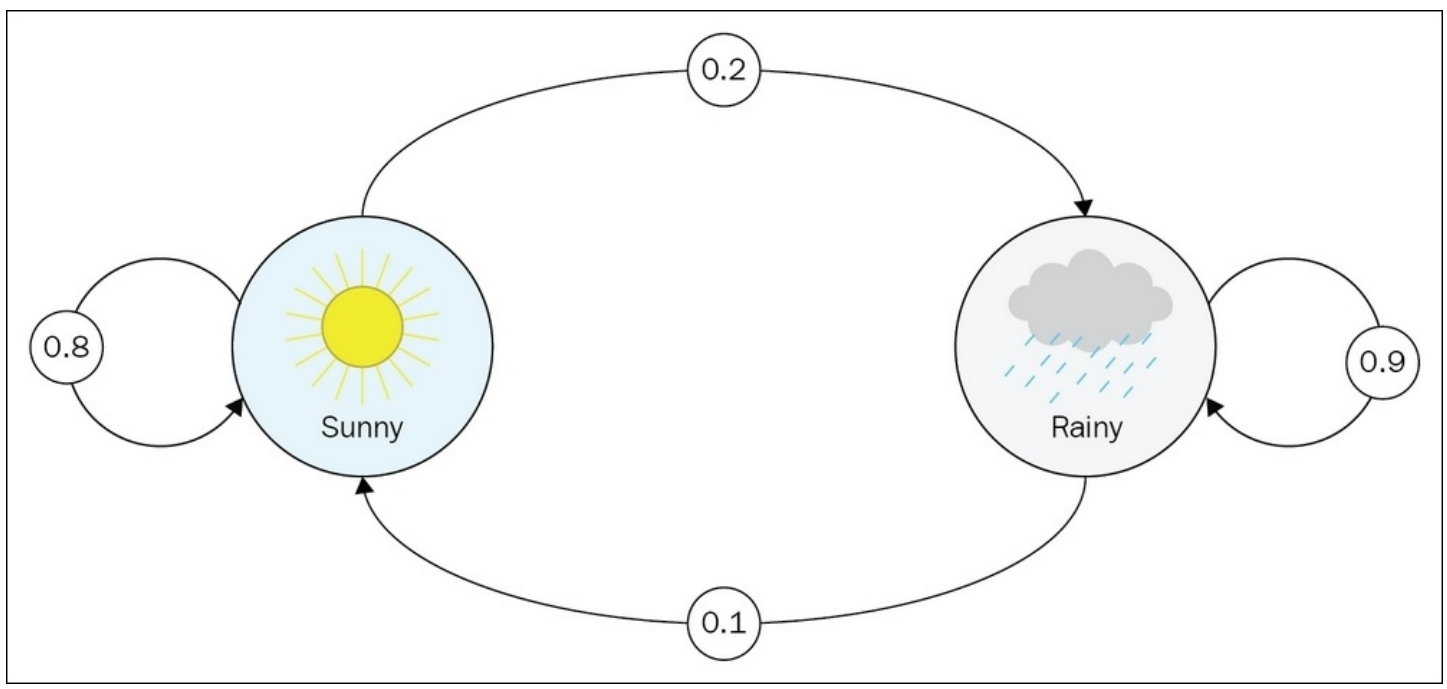

Note here the states are **static** in nature. That means once a state is defined, it cannot change, and there is no underlying principle that can change the properties of a state.

## **Markov Reward Process 🏆**

In simple terms, these are the **extension of the Markov processes**. Because now, instead of just talking about the **states and their transitions**, we also talk about **the states, the transitions and the reward** we get from such a **transition**.

Initially, our table consisted of **states and their respective transitions or actions**. Now, whenever we make a **transition from one state to another**, or we take an **action in order to travel from one state to another**, we **achieve a reward**. When we consider that a **reward** will be **gained irrespective of the previous state**, then we can simply store the **state-reward matrix**, which is a compact representation of the **state-to-state transition and reward matrix**.

The **γ term** that we added in these rewards is to basically ensure that we **pay attention** to the **far rewards as well as the current rewards**. So it's to maintain the balance between **immediate rewards and distant rewards.**

 * If $γ = 1$, then it will pay equal attention to all the rewards.

 * $γ = 0$, then it will pay attention to only the immediate rewards.

 * This value is generally set between $γ=[0.9-0.99]$ to pay attention to the distant rewards, but not too distant rewards.

Formally, the equation for the **total rewards per episode for some timestamp T** is given as:

> $G_t$ $= R_t$ $_+$ $_1$ + $γR_t$ $_+$ $_2$ + $...$ = $∑^∞_k$$_=$$_0$ $γ^k$$R_t$$_+$$_k$$_+$$_1$

This value itself is not very useful in practice, Although this quantity for the **expected value of the return of the state** is very useful, it's termed as the **value of a state** and its defined as:

> $V(s) =$ $E[G|$$S_t = s]$


Intuitively, it is the **reward that we can expect from a state on average**.

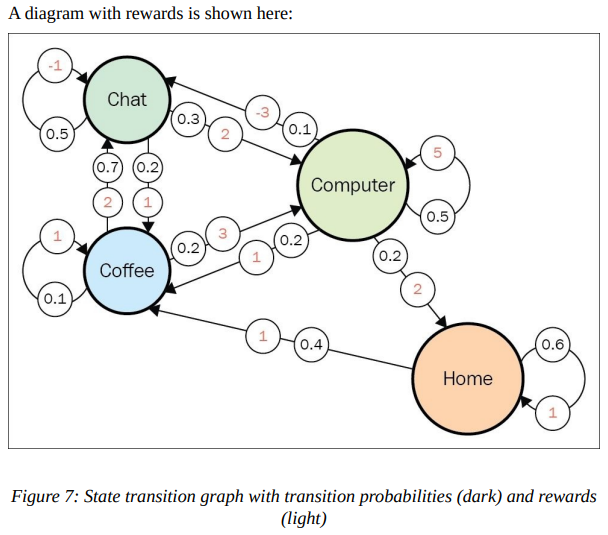

The **value of a state** is the **average reward that we can attain from the state**. And it can also be described as the **reward based on a certain transition.**

---

let's set the $γ = 0$

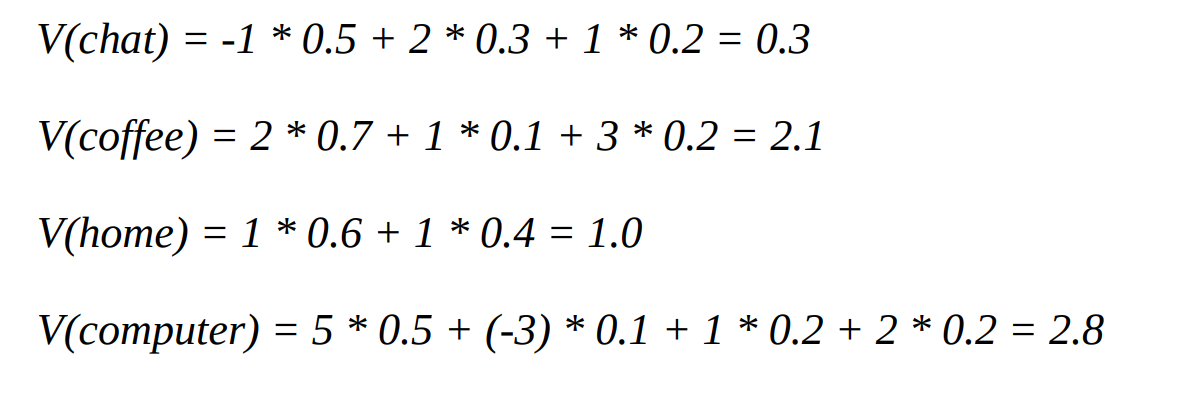

Clearly here, the computer state is the most valuable state. And the reason behind this is simple, going from computer to computer is the highest probable outcome with the highest reward.

---

Lets set $γ = 1$

Well, the answer in the current scenario is **$∞$**, because there is **no state in the current graph that has no edges**, **no isolated state**, basically. So there is **no state where we can end**. We can always **keep going and going**. And that's why the **value is $∞$.**

That's why the $γ$ plays an **important role** in **reinforcement learning**. Although calculating **every single value of state for almost infinite states in the game is and doesn't seems to be possible.** But **computers are very good at calculations**, so generally these values are **calculated**. There are **many methods** that are used to calculate this. For example, the **Bellman Equation**, or using **Q-values**.

## **Markov Decision Processes 🦩**

Once you integrate "$Actions"$ into **MRPs**, they become **Markov Decision Processes(MDPs)**. For adding actions into the **MRPs**, we first need to have a **set of actions**. And for sure, this has to be **finite**.

The incorporation is quite simple, but a little complex. So for incororating actions, we need to transform our transition matrix. Currently, our **transition matrix represents the probability of a transition**. But now it expresses **the probability that an action can be chosen by our agent**.

Because now our agent has the right to choose the actions. So instead of a **square matrix**, our transition matrix becomes a **Cube**, where the **ith and the jth rows and columns** are representing **the states, and their values are representing the probabilities.** And then $Z$ dimension actually represents **the action**. So **depth dimension represents action.**

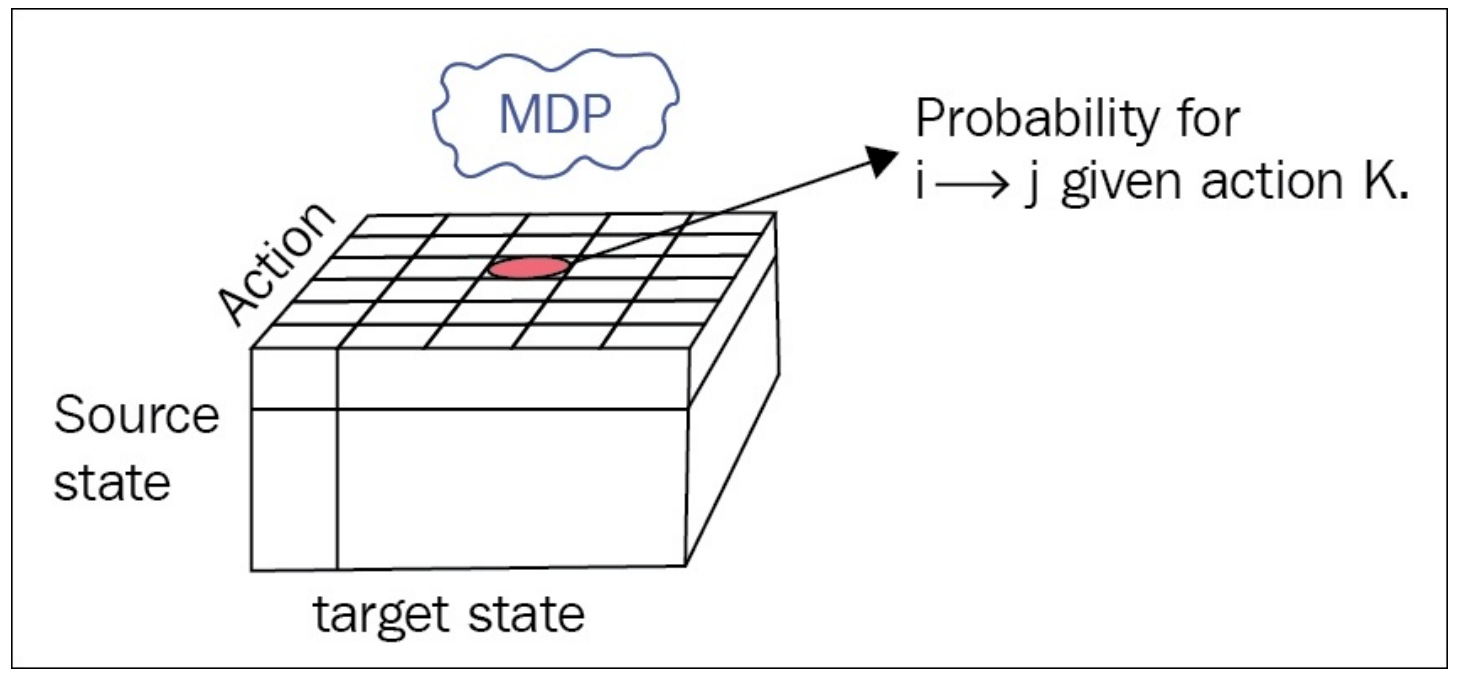

The final change will be to incorporate our **actions** into our **rewards matrix**. So instead of just the state representing the rewards, we have now a **state-action pair** representing a **reward**.

> $Policy$ : A policy is defined as a set of rules that governs the agents behavior.

> $Optimal$ $Policy$ : A policy specifically designed to achieve the maximum rewards(The rewards are cumulative or accumulated rewards not immediate rewards, but this can depend upon the specific policy. For example, greedy policies will follow the immediate reward).

A particular environment and an agent can have almost $∞$ number of policies. For example, a **random policy** that takes **random actions**, a **blind policy** that just **do something**, doesn't caring about anything else.

Formally, or mathematically, a policy is given as the probability distribution over actions for every possible state:

> $π(a|s) = P⟦A_t = a| S_t = s⟧$

You might wonder why this is a **probability distribution** and **not a concrete distribution**. The reason is simple. It's to **balance exploration and exploitation**. And to **include some randomness into the actions of the agent.**

# **Bellman Equation of Optimality 🎄**

Let's understand the **Bellman equation** with a **simple model**. We have a situation where our agent is at the state $S_0$, and it can take $N$ **possible actions** and can reach $N$ **possible states**. So for each **possible state**, we have a $V_s$ $_($ $_n$ $_)$.

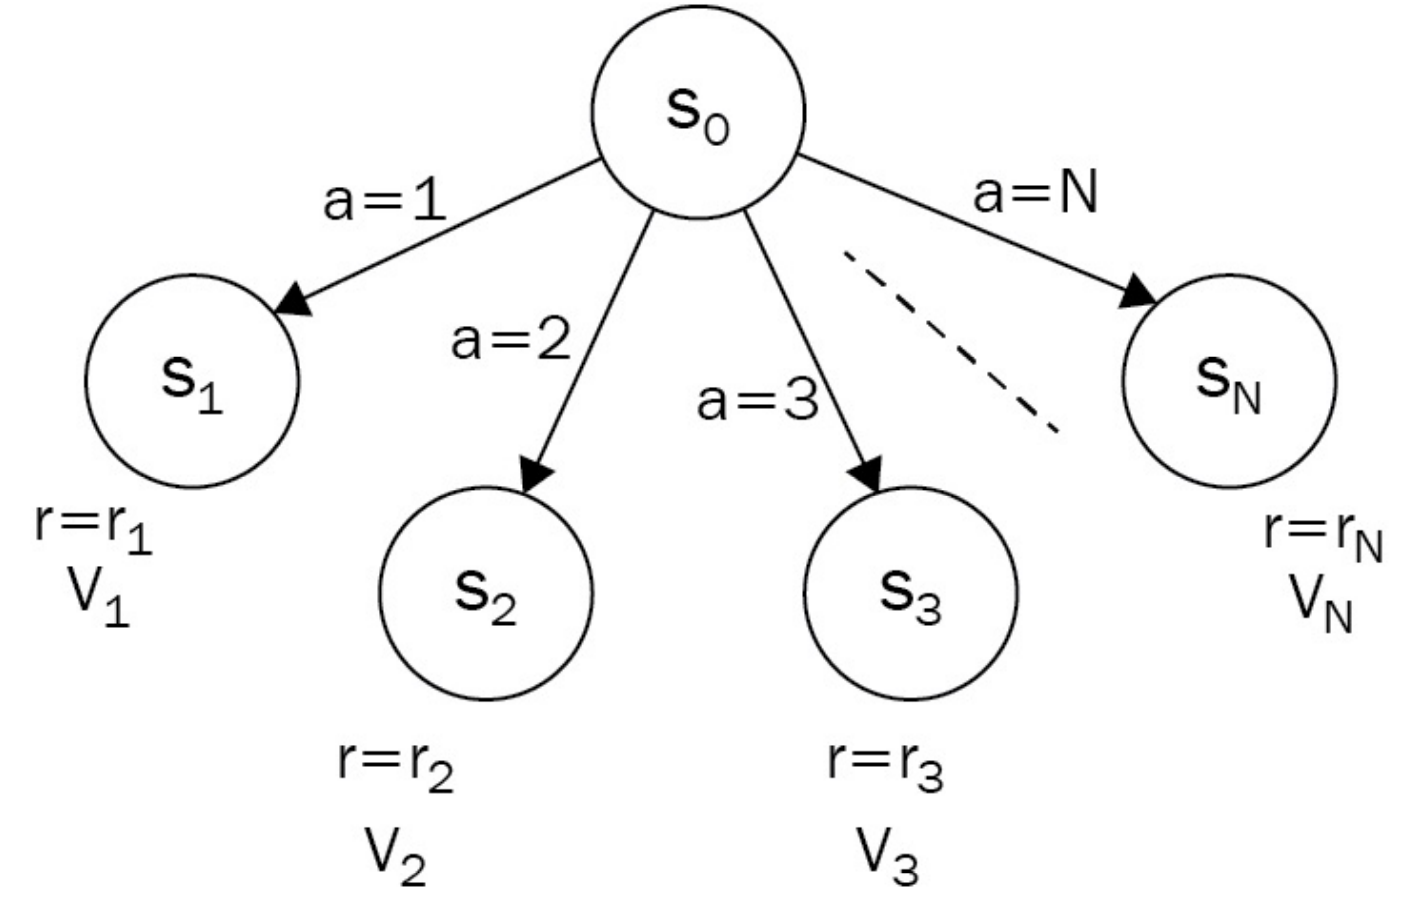

When we take a particular action $a$, the $V_s$ can be defined as,

> $V_0(a = a_i) = r_i + V_i$

Now, in this situation, what would be **the best possible move** that we can take? We can easily formulate as as the **maximum reward** that we can get by taking a **particular action**. So out of all these $N$ possible actions, we selected the **one with the maximum reward**.

> $V_0 = max_a$ $_[$ $_1$ $_-$ $_N$ $_]$ $(r_a + V_a)$

I bet you have seen this equation before. Currently, we are taking all the **actions greedily**. We are selecting **the action that gives us the maximum reward** at the current time step. And this is what we call as **greedy equations**. But with just one little twist, this equation becomes an optimal policy,

> $V_0 = max_a$ $_[$ $_1$ $_-$ $_N$ $_]$ $(r_a + $δ$ V_a)$

The introduction of the **discount factor $δ$** allows us to have a **look in the future**. Thus we are maximizing the rewards for the current time step as well as the **future rewards** that we can get. So **maximizing the overall policy** in such a manner will lead us to the **optimal solution**.

**Richard Bellman** proved that with that extension, our behavior will get **the best possible outcome**. In other words, it will be **optimal**. So, the preceding equation is called the **Bellman equation** of value (for a deterministic case). The good thing is that this equation can also be formulated for the **statistic form**.

---

For **the nondeterministic** or **the stochastic version, we will have to include the concept of **probabilities**. The Agent at the current state can take a possible action. And this action has a probability(s) of leading to a certain state(s).

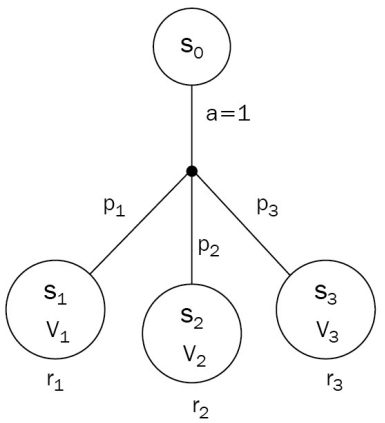

Now, in order to get the **expected value** of this **particular state**, we need to **sum up all the probabilities with respect to the rewards** and the **future states.** This is formulated as,

> $V_0 (a = 1) = p1 ∙ (r_1 + δV_1) + p2 ∙ (r_2 + δV_2) + p3 ∙ (r_3 + δV_3)$

More formally,

> $V_0(a) = E_s$$_ε$$_S$ $[r_s$ $_,$ $_a$ $+ δV_s]$ $= ⅀_s$$_ε$$_S$ $P_a ∙ _0$ $_-$ $_>$ $_s$ $(r_s$ $_,$ $_a$ $+ δV_s)$

Taking the case of $N$ possible actions this equation becomes,

> $V_0(a) =$ $max_a$ $_ε$ $_A$ $E_s$$_ε$$_S$ $[r_s$ $_,$ $_a$ $+ δV_s] =$ $max_a$ $_ε$ $_A$ $⅀_s$$_ε$$_S$ $P_a ∙ _0$ $_-$ $_>$ $_s$ $(r_s$ $_,$ $_a$ $+ δV_s)$

This **definition is recursive** in nature, and the **initial point** is another **randomly decided**, and that's pretty common in **computer science**. In fact, it's **regularly used even in machine learning and deep learning**.

Note: These values do not give us the best possible reward for the state, but they give us the optimal policy in order to achieve those rewards.

---

To make things slightly easier, we can define the **value of a state** in terms of other quantities, such as the **value of action**. Value of our action can be defined as the **expected reward** the agent can achieve by taking a particular action. Now, this **expected reward** becomes its **value of action**. While the **value of a state** is more fundamental, **value of action** is more **practical**. And this value gave rise to a whole set of new algorithms known as $Q-Learning$.

> $Q(s, a) = E_s$ $_→$ $_S$ $[r_s$ $_,$ $_a$ $+ δV_S]$ $= Σ_s$ $_→$ $_S$ $P_a$ $_,$ $_s$ $_→$ $_S$ $(r_s$ $_,$ $_a$ $+ δV_S)$

Intuitively, the $Q-value$ for a **state, action pair** is the **sum of the immediate reward and the discounted future rewards** that we can get from that **state by a particular action**. So $V_S$ can be defined as,

> $V_S$ $= max_a$ $_ε$ $_A$ $Q(s, a)$

This indeed look similar to the previous **Bellman equation** that we have talked about, but believe me, there are some **important differences** between them. Finally, the $Q(s, a)$ can again be described in terms of itself.

> $Q(s, a)$ = $r(s, a) + δQ(s', a')$

---
If you still see some problem in understanding this, then don't worry. It is a mathematical concept, and it can be quite difficult for some people. Just understand that instead of evaluating the $V_S$, we are now evaluating everything based on the perspective of $V_a$. $V_a$ is nothing but the rewards that you can get by taking that particular action $(a)$ being present in a particular state $(s)$.

# **Value Iteration Method 👨‍🔬**

One question still remains the same. How do we calculate $V_s$, or $V_a$?

> There might be situations where $S_0$ points towards a $S_1$ and $S_1$ points back to $S_0$. In this situation, the calculation becomes tough (reaches $∞$).

One solution is to include the discount factor $(δ)$ that allows us to decreaser the presence of the rest of these states over iterations.

And that's where the **value iteration method** comes in. By performing calculations for **few iterations** in a **recursive manner**, we can **estimate $V_s$, or $V_a$**.

Remember, we are doing **estimation** not an **actual calculation** of the $V_s$. So whatever value we achieve is an **estimated value**, which theoretically should be an **approximation to the actual value.**

> $Q(s, a) = Random$

Other $T$ iterations,

> $Q(s, a) ← r(s, a) + δV(s', a')$

After the $T$ iterations,

> $Q(s, a) ≈ Q*(s, a)$

Remember, we are doing this for the $Q-Values$ because they are more practical.

---
You might understand that there are certain things which are still possessing problem to our solution.
The **transition probabilities**, all the methods that we have discussed by now require as to have a **prerequisited knowledge** of the **transition probabilities** of the environmetn, which obviously the agent does not have at the initial stage. That's why we need to come up with something, that can solve this problem.


> Although one thing that we can do is to maintain a record for the **transition probabilities** based on the **count** they have occurred after taking **certain action** and **updating this count** iteratively and then **normalizing it** in order to get the **probabilities.**

---
This method is only functional where deriving $V_S$ is possible. By that, we mean that the $V_s$ are discrete in nature. For **continuous values**, there are **infinitely many states**. And thus the computations are not possible. For example, the **Cart Pole** environment.

In [17]:
class VIAgent:               # Value Iteration Agent

    def __init__(self, env_name:str, gamma:float) -> None:

        """
        Initializes the environment configurations and records for the
        Value Iteration method.

        Arguments:
            env_name(str): The ID of the environment to be create.
            gamma(float): The gamma parameter or discount factor.

        Return:
            None
        """

        # Game Configs
        self.env = gym.make(env_name)
        self.n_acts = self.env.action_space.n
        self.n_obs = self.env.observation_space.n
        self.state = self.env.reset()
        self.gamma = gamma

        # Records
        self.rewards = defaultdict(float)
        self.transitions = defaultdict(Counter)
        self.values = defaultdict(float)

    def play_random_steps(self, n_steps:int) -> None:

        """
        This function allows our model to first explore the environment
        completely randomly by taking random actions. And during this process,
        the agent gets and stores information about the environment, such as the
        rewards and transitions it can make.

        Argument:
            n_steps(int): Steps for which the agent can explore the environment.

        Return:
            None
        """

        # Play randomly for n_steps
        for step in range(1, n_steps + 1):

            # Execute a random action
            action = self.env.action_space.sample()
            new_state, reward, done, _ = self.env.step(action)

            # Update the records
            self.rewards[(self.state, action, new_state)] = reward
            self.transitions[(self.state, action)][new_state] += 1

            # Update the State
            self.state = self.env.reset() if done else new_state

    def calc_action_value(self, state, action) -> float:

        """
        Applying the Bellman Equation and it calculates the action value for
        the particular (state, action) pair.

        Arguments:
            state: The current state of the agent/environment.
            action: The action choosen by the agent.

        Return:
            act_value(float): The action value for the current (state, action) pair.

        """

        # An approximation to the probability by transition table.
        state_counts = self.transitions[(state, action)]
        total_counts = sum(state_counts.values())

        value_of_action = 0.0

        # Apply Bellman Eqation
        for new_state, count in state_counts.items():
            reward = self.rewards[(state, action, new_state)]
            value_of_action += (count/total_counts)  * (reward + self.gamma * self.values[new_state])

        return value_of_action

    def best_action(self, state):
        """
        Based on the agent's experience of values, this function returns the
        best possible action for the current state.

        Arguments:
            state: The state of the environment/agent.

        Returns:
            best_action: The best action the agent can execute.

        """

        # Initialize Values
        best_action, best_value = None, None

        # Compute the best action
        for action in range(self.n_acts):
            action_value = self.calc_action_value(state, action)
            if best_value is None or action_value > best_value:
                best_value = action_value
                best_action = action

        return best_action

    def value_iteration_method(self):
        """
        Applies the value iteration method by going through all the states and
        all the possible actions and computing their action values.

        Arguments:
            None
        Returns:
            None
        """

        # Loop(iterate) over all possible (state, action) pairs.
        for state in range(self.n_obs):
            state_values = [
                self.calc_action_value(state, action)
                for action in range(self.n_acts)
            ]
            self.values[state] = max(state_values)

    def gameplay(self, env) -> float:

        """
        After going through all the hacked calculations, you allow the agent
        to explore and exploit the environment.

        Argumnets:
            env: The environment in which the agent is being tested.

        Returns:
            total_rewards(float): Total rewards accumulated by the agent.

        """

        total_rewards = 0.0
        state = env.reset()

        while True:

            # Compute and execute the best possible action.
            best_action = self.best_action(state)
            new_state, reward, done, _ = env.step(best_action)

            # Update the environment records
            total_rewards += reward
            self.rewards[(state, best_action, new_state)] = reward
            self.transitions[(state, best_action)][new_state] += 1

            # Update the environment state
            state = new_state

            # Exit once done.
            if done:
                break

        return total_rewards

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above code does everything we need for the **value iteration method**, **computing the Bellman equation**, **computing the best possible actions**, **executing the best possible action**. Let's have a **practical test** for our agent.

In [18]:
# Initiate testing environment
test_env = gym.make(ENV_NAME)

# Initialize the value iteration agent
agent = VIAgent(env_name = ENV_NAME, gamma = GAMMA)

# Gameplay variables
n_iters = 0
best_reward = 0.0

# Play until the best reward is achieved
while True:

    # Increment the iteration variable
    n_iters += 1

    # The exploration phase
    agent.play_random_steps(n_steps = 100)

    # The computation/exploitation phase.
    agent.value_iteration_method()

    # Test the in Agent
    rewards = 0.0
    for _ in range(TEST_EPS):
        rewards += agent.gameplay(env = test_env)

    # Normailize the Rewards gained
    rewards/=TEST_EPS

    # Exit ones done.
    if best_reward < rewards:
        best_reward = rewards
        print(f"Best Reward Updated to: {best_reward}")

    if best_reward > 0.8:
        print(f"Problem Solved!! BEST REWARD: {best_reward} ITER: {n_iters}")
        break

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Best Reward Updated to: 0.15
Best Reward Updated to: 0.5
Best Reward Updated to: 0.75
Best Reward Updated to: 0.85
Problem Solved!! BEST REWARD: 0.85 ITER: 15


This **value iteration method** is **lightning-fast** and **incredibly(for now) efficient** in tackling problems within the **environment almost instantly**.

Its superiority over the **Cross Entropy method** lies in its **immediate ability to start learning** about the environment from the **very first step**. Unlike the **cross-entropy method**, which requires **achieving rewards before learning**, this approach begins learning right away.

However, as the **observation state and possible actions** expand to **larger scales**, this method can become **significantly more challenging to implement.**

In [20]:
# Visualize the agent playing in the environment.
env = gym.make(ENV_NAME)
state = env.reset()
video_rec = VideoRecorder(env, "VIAgent.mp4")

while True:

    action = agent.best_action(state)
    state, reward, done, _ = env.step(action)
    video_rec.capture_frame()

    if done:
        break

video_rec.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

In [22]:
# Play video/download and play it.
moviepy.editor.ipython_display("./VIAgent.mp4")

# **Q-Learning 🤖**

The **value iteration method** showcased **remarkable efficiency**, **swiftly solving problems** almost instantaneously. However, there exist **potential enhancements to this method**, especially for **broader applications** with slightly **larger observation** and **action spaces**.

This enhanced version, termed **Q Learning**, introduces modifications to make the approach **more practical** and **effective in these expanded scenarios**. While the disparity between the two methods is **subtle**, this evolution aims to adapt the **value iteration method** for **more versatile and scalable applications.**

In [23]:
class QAgent:

    def __init__(self, env_name:str, gamma:float) -> None:

        """
        Initializes the environment configurations and records for the
        Value Iteration method.

        Arguments:
            env_name(str): The ID of the environment to be create.
            gamma(float): The gamma parameter or discount factor.

        Return:
            None
        """

        # Game Configs
        self.env = gym.make(env_name)
        self.n_acts = self.env.action_space.n
        self.n_obs = self.env.observation_space.n
        self.state = self.env.reset()
        self.gamma = gamma

        # Records
        self.rewards = defaultdict(float)
        self.transitions = defaultdict(Counter)
        self.values = defaultdict(float)

    def play_random_steps(self, n_steps:int) -> None:

        """
        This function allows our model to first explore the environment
        completely randomly by taking random actions. And during this process,
        the agent gets and stores information about the environment, such as the
        rewards and transitions it can make.

        Argument:
            n_steps(int): Steps for which the agent can explore the environment.

        Return:
            None
        """

        # Play randomly for n_steps
        for step in range(1, n_steps + 1):

            # Execute a random action
            action = self.env.action_space.sample()
            next_state, reward, done, _ = self.env.step(action)

            # Update the records
            self.rewards[(self.state, action, next_state)] = reward
            self.transitions[(self.state, action)][next_state] += 1

            # Update the State
            self.state = self.env.reset() if done else next_state

    def best_action(self, state):
        """
        Based on the agent's experience of values, this function returns the
        best possible action for the current state.

        Arguments:
            state: The state of the environment/agent.

        Returns:
            best_action: The best action the agent can execute.

        """

        # Initialize Values
        best_action, best_value = None, None

        # Compute the best action
        for action in range(self.n_acts):
            action_value = self.values[(state, action)]
            if best_value is None or action_value > best_value:
                best_value = action_value
                best_action = action

        return best_action

    def q_iteration(self):
        """
        Applies the Q learning method by going through all the states and
        all the possible actions and computing their action values.

        Arguments:
            None
        Returns:
            None
        """

        # Loop(iterate) over all possible (state, action) pairs.
        for state in range(self.n_obs):
            for action in range(self.n_acts):

                action_value = 0.0

                state_counts = self.transitions[(state, action)]
                total_counts = sum(state_counts.values())

                for next_state, count in state_counts.items():
                    reward = self.rewards[(state, action, next_state)]
                    next_action = self.best_action(next_state)

                    action_value += (count/total_counts) * (reward + self.gamma * self.values[(next_state, next_action)])

                self.values[(state, action)] = action_value

    def gameplay(self, env) -> float:

        """
        After going through all the hacked calculations, you allow the agent
        to explore and exploit the environment.

        Argumnets:
            env: The environment in which the agent is being tested.

        Returns:
            total_rewards(float): Total rewards accumulated by the agent.

        """

        total_rewards = 0.0
        state = env.reset()

        while True:

            # Compute and execute the best possible action.
            best_action = self.best_action(state)
            next_state, reward, done, _ = env.step(best_action)

            # Update the environment records
            total_rewards += reward
            self.rewards[(state, best_action, next_state)] = reward
            self.transitions[(state, best_action)][next_state] += 1

            # Update the environment state
            state = next_state

            # Exit once done.
            if done:
                break

        return total_rewards

  and should_run_async(code)



If you examine the **alterations closely**, you'll observe their **subtlety**. The **fundamental change** lies in shifting from **computing the precise value of an action or state to approximating it.**

These approximations are termed **Q Values** and serve as **the foundation of Q Learning**. The essence here is to **approximate Q values** rather than **precisely calculating them**, and remarkably, this approach **proves effective in practice.**

In [25]:
# Initiate testing environment
test_env = gym.make(ENV_NAME)

# Initialize the value iteration agent
agent = QAgent(env_name = ENV_NAME, gamma = GAMMA)

# Gameplay variables
n_iters = 0
best_reward = 0.0

# Play until the best reward is achieved
while True:

    # Increment the iteration variable
    n_iters += 1

    # The exploration phase
    agent.play_random_steps(n_steps = 100)

    # The computation/exploitation phase.
    agent.q_iteration()

    # Test the in Agent
    rewards = 0.0
    for _ in range(TEST_EPS):
        rewards += agent.gameplay(env = test_env)

    # Normailize the Rewards gained
    rewards/=TEST_EPS

    # Exit ones done.
    if best_reward < rewards:
        best_reward = rewards
        print(f"Best Reward Updated to: {best_reward}")

    if best_reward > 0.8:
        print(f"Problem Solved!! BEST REWARD: {best_reward} ITER: {n_iters}")
        break

  and should_run_async(code)

  deprecation(

  deprecation(



Best Reward Updated to: 0.2
Best Reward Updated to: 0.3
Best Reward Updated to: 0.35
Best Reward Updated to: 0.55
Best Reward Updated to: 0.65
Best Reward Updated to: 0.7
Best Reward Updated to: 0.8
Best Reward Updated to: 0.85
Problem Solved!! BEST REWARD: 0.85 ITER: 44


The **increase in iterations** is noticeable due to the **approximation of values**. Despite this resulting in a **slightly longer learning period**, it **significantly enhances** the **method's adaptability across diverse environments or problem sets**. This **trade-off** in **learning time equates** to a **broader applicability in various scenarios**.

In [28]:
# Visualize the agent playing in the environment.
env = gym.make(ENV_NAME)
state = env.reset()
video_rec = VideoRecorder(env, "QAgent.mp4")

while True:

    action = agent.best_action(state)
    state, reward, done, _ = env.step(action)
    video_rec.capture_frame()

    if done:
        break

video_rec.close()
moviepy.editor.ipython_display("./QAgent.mp4")

  deprecation(

  deprecation(

  logger.deprecation(

  logger.deprecation(

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(



**Note:** *Although the model is strained, it can still end up in some failed cases.*

---
That's how **Q learning works** and **what it is**. I hope you enjoyed this note book. Make sure to **upvote** if you like this. That's all from my side for today. **See you soon** 👋.

---
**DeepNets**